In [87]:
import pandas as pd
import numpy as np
import pm4py
from matplotlib import pyplot as plt
import seaborn as sns
from fitter import Fitter
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [88]:
df = pd.read_csv('C:/Users/HP/Desktop/registroeventi_202205241702.csv')

In [89]:
df["opentime"] = pd.to_datetime( df["opentime"] )
df['opentime'] = df['opentime'].dt.strftime('%m-%d')

In [90]:
df.drop(['id_linea', 'id_causale', 'descr', 'tipo_causale', 'id_user', 'id_jobsetting', 'id_ordprod', 'qta', 'closetime'], axis=1, inplace=True)

In [91]:
df.dropna(inplace=True)

In [92]:
df['counter'] = 1

In [93]:
df_count = df.groupby('opentime').agg({'counter': 'sum',})

In [94]:
df_count = df_count.iloc[1: , :]

In [95]:
df_count.sort_index(inplace=True)

In [101]:
df_count['date'] = df_count.index

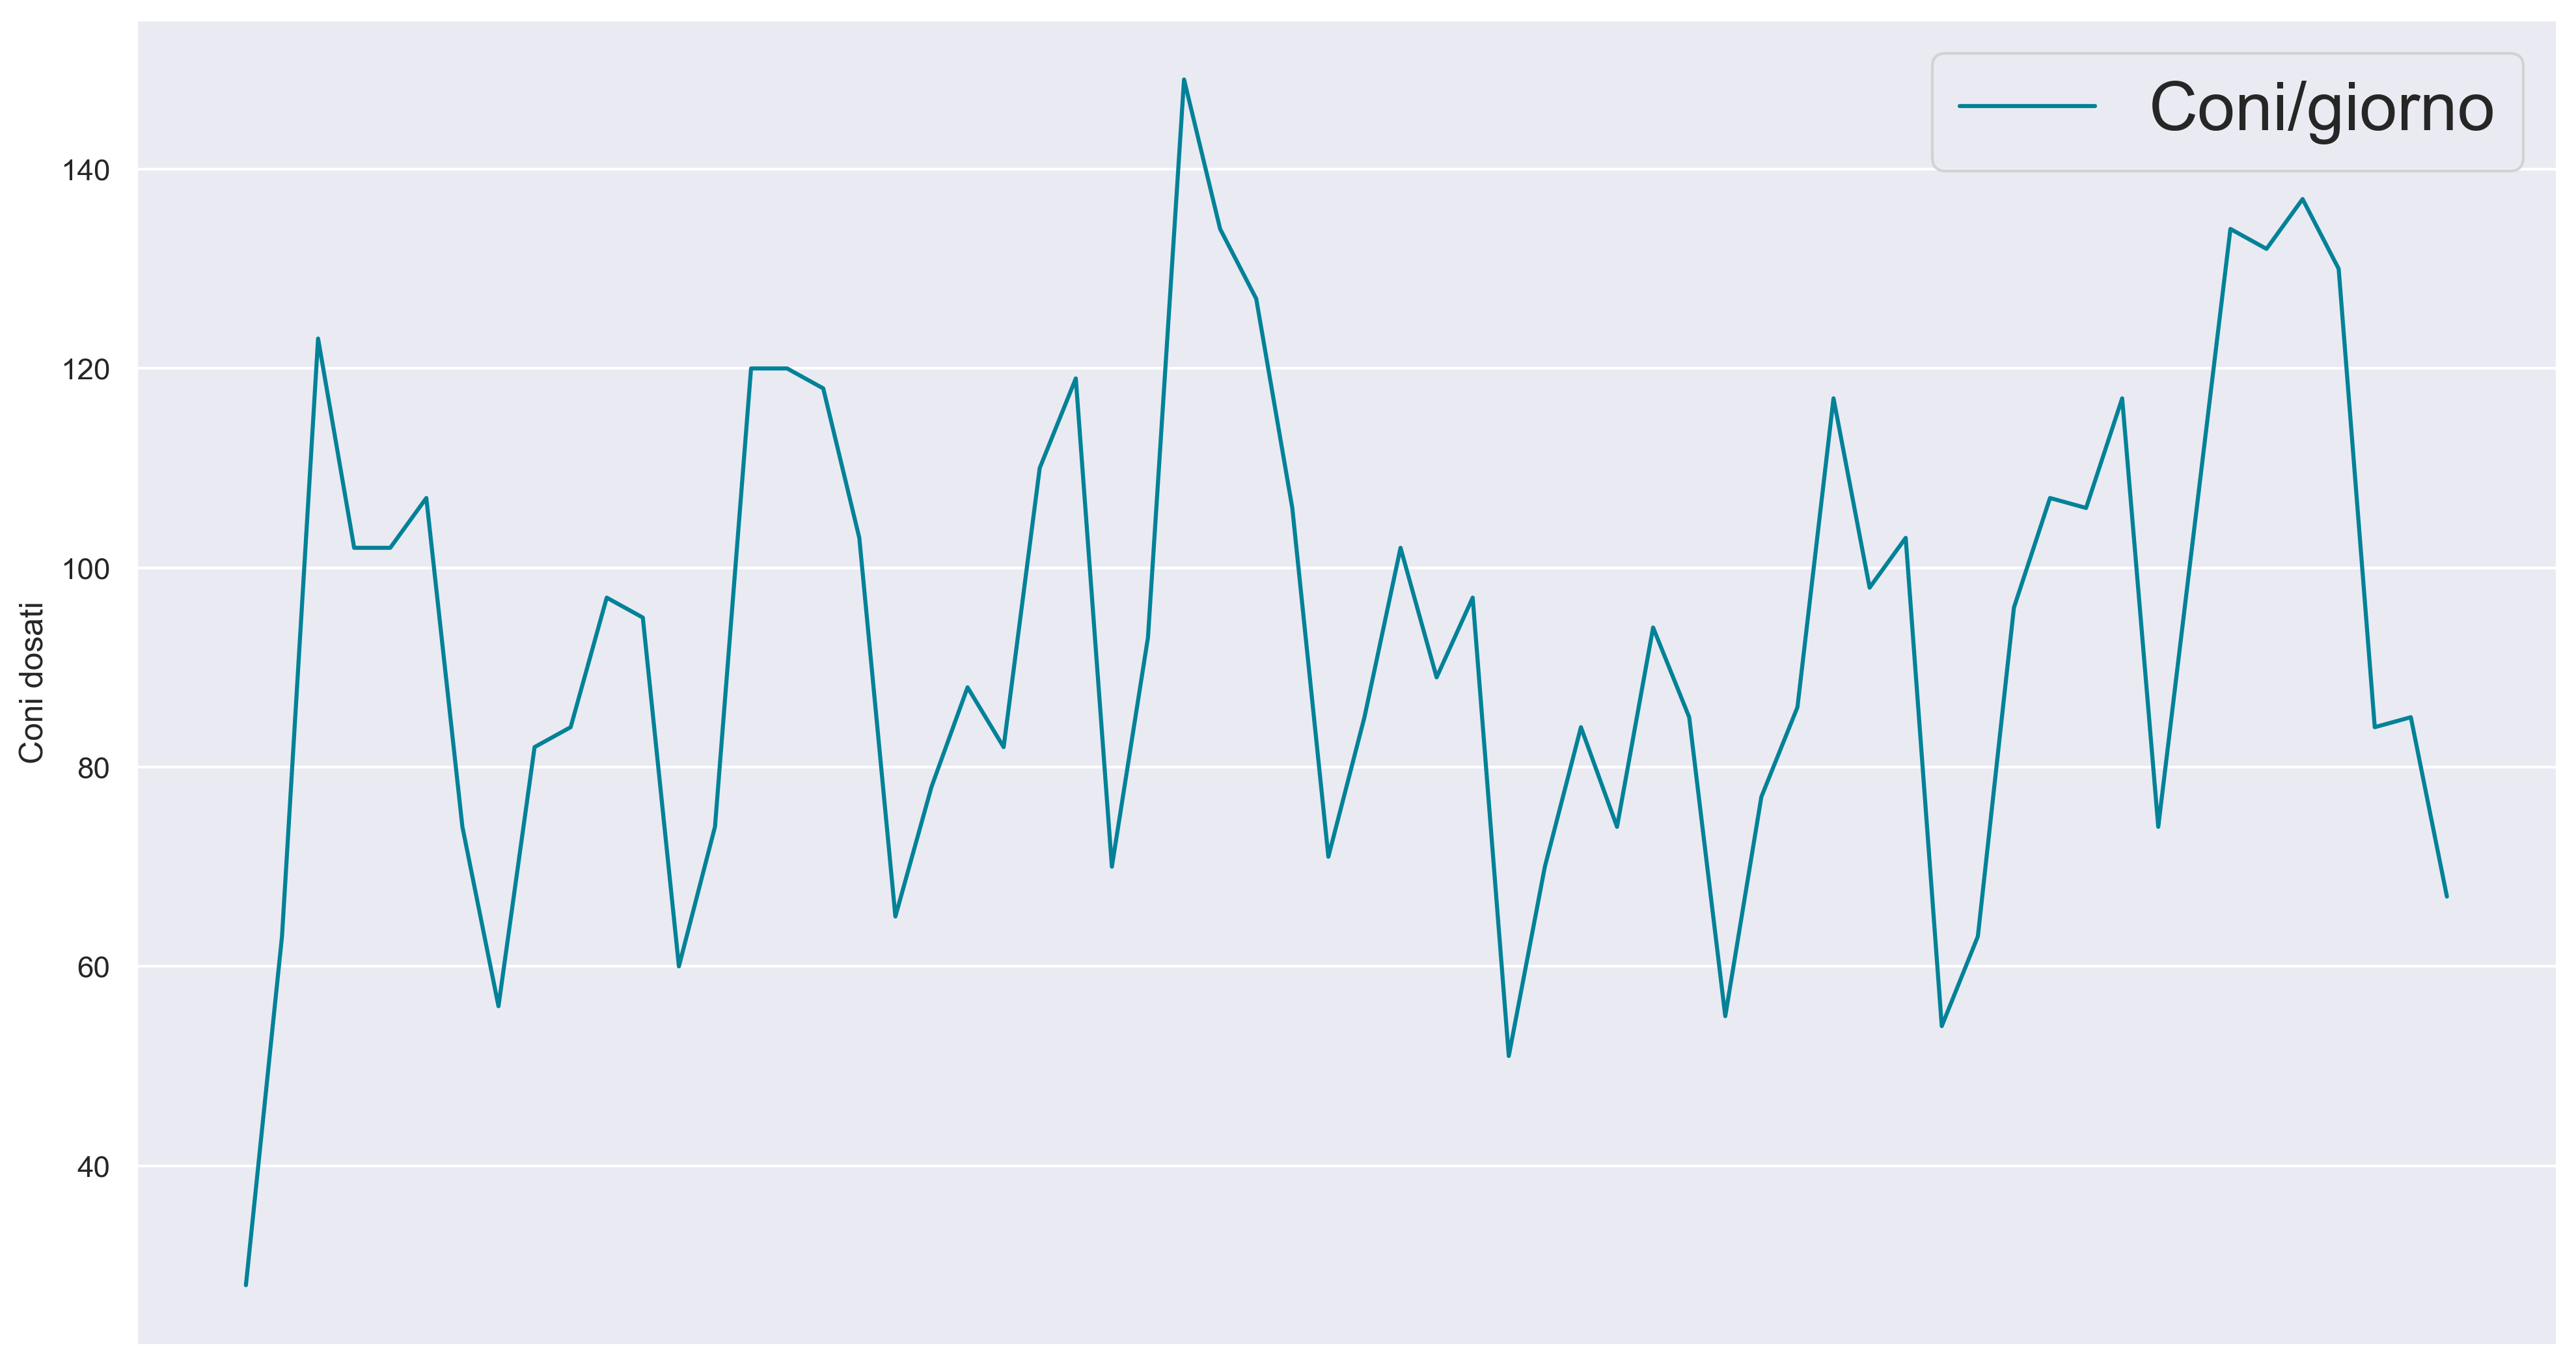

In [103]:
plt.figure(figsize=(16, 9), dpi=300)
plt.ylabel('Coni dosati')
plt.xlabel('Giorno')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.plot(df_count['date'], df_count['counter'], label='Coni/giorno', color=(1/235, 120/235, 140/235))
plt.legend(prop={'size': 25})
plt.savefig('C:/Users/HP/Desktop/coni_giorno.png')